##### Full version in my github : https://github.com/WangYenTing/Python

# Gold Price 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from bokeh.charts import TimeSeries, output_file, show

In [2]:
df = pd.read_csv('Prices.csv', parse_dates=True)

df = df[['Date', 'US dollar', 'G5 currency index', 'Producer index', 'Consumer index']]
df_day= pd.DataFrame(columns = ['30_day', '60_day', '120_day', '240_day'])
df = pd.concat([df,df_day], axis = 1)
df.columns = df.columns.str.replace(' ','_')
df['US_dollar'] = df['US_dollar'].str.replace(',','')
df[['US_dollar','30_day','60_day','120_day','240_day']] = df[['US_dollar','30_day','60_day','120_day','240_day']].astype('float')
df['Date'] = pd.to_datetime(df.Date, errors = 'raise')
df = df.set_index(df['Date'], drop = True)

## moving average value

In [3]:
t = 30; s = 60; tlf = 120; ttf = 240
for num in range(len(df['US_dollar'])+1):
    df.iloc[t-1:t, 5] = df.iloc[t-30:t, 1].mean()
    t += 1
    df.iloc[s-1:s, 6] = df.iloc[s-60:s, 1].mean()
    s += 1
    df.iloc[tlf-1:tlf, 7] = df.iloc[tlf-120:tlf, 1].mean()
    tlf += 1
    df.iloc[ttf-1:ttf, 8] = df.iloc[ttf-240:ttf, 1].mean()
    ttf += 1
df.to_csv('Prices_new.csv')
df[-3:]

,Date,US_dollar,G5_currency_index,Producer_index,Consumer_index,30_day,60_day,120_day,240_day
Date,,,,,,,,,
2017-10-25,2017-10-25,1275.0,446.4,635.7,891.7,1289.240000,1293.971667,1272.010000,1242.830833
2017-10-26,2017-10-26,1273.8,447.1,638.2,897.8,1287.546667,1294.066667,1272.431667,1243.196250
2017-10-27,2017-10-27,1266.5,444.1,636.8,893.7,1285.666667,1294.213333,1272.725000,1243.524583


## Gold Price Line Charts

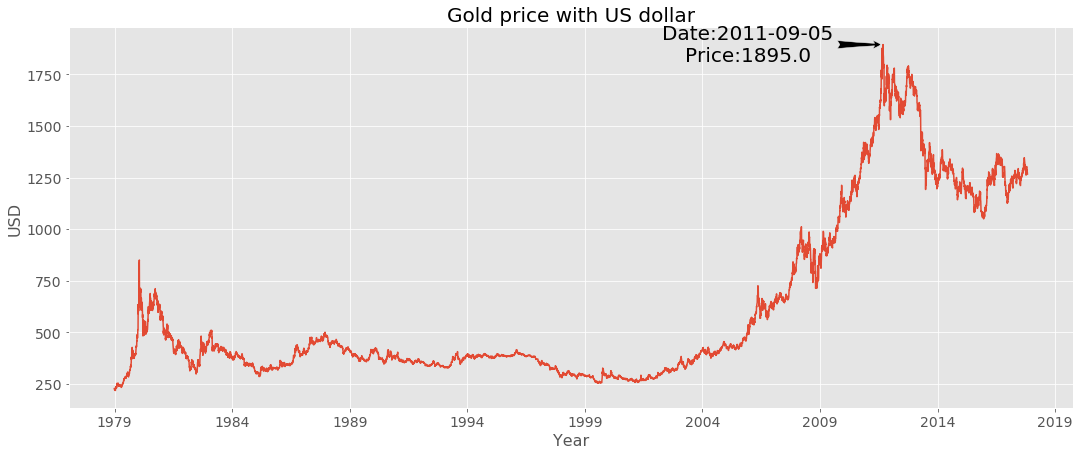

In [4]:
plt.rcdefaults() ##reset plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,7)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14 
plt.rcParams['ytick.labelsize'] = 14  
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['savefig.bbox'] = 'tight'

plt.plot(df['Date'], df['US_dollar'])  
plt.title('Gold price with US dollar') ; plt.xlabel('Year') ; plt.ylabel('USD')

ymax = df['US_dollar'].max()
xpos = list(df['US_dollar']).index(df['US_dollar'].max()) 
xmax = df.Date[xpos] 

plt.annotate('%s%s%s%s' %('Date:', str(xmax)[:10], '\nPrice:', ymax), xy=(xmax, ymax), 
             xytext=(df.Date[xpos-1500], ymax), size = 20,
             va="center", ha="center", arrowprops=dict(facecolor='black', arrowstyle='fancy'))
#plt.savefig('img/GoldPrice_US dollar.png')

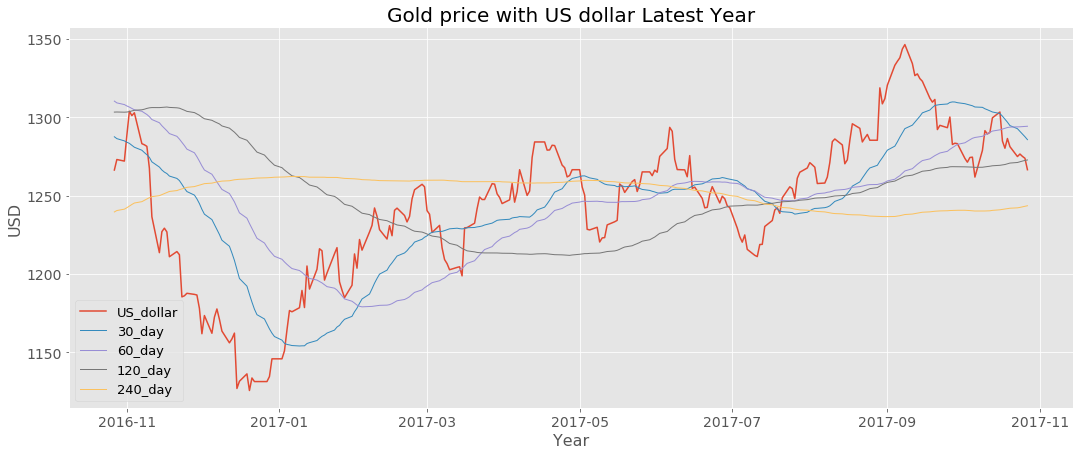

In [5]:
plt.rcParams['legend.fontsize'] = 13
ndf = df[-262:]
plt.plot(ndf['Date'], ndf['US_dollar'])
plt.plot(ndf['Date'], ndf['30_day'], lw = 1)
plt.plot(ndf['Date'], ndf['60_day'], lw = 1)
plt.plot(ndf['Date'], ndf['120_day'], lw = 1)
plt.plot(ndf['Date'], ndf['240_day'], lw = 1)

plt.title('Gold price with US dollar Latest Year')
plt.xlabel('Year')   
plt.ylabel('USD')   
plt.legend() 
#plt.savefig('img/GoldPrice_latestyear.png')

## GoldPrice - Bokeh Plot

In [ ]:
df_plot = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']]
p = TimeSeries(df_plot, title="GoldPrices_History", ylabel='US dollar', xlabel = 'Year', width=800, height=450)
output_file("img/GoldPrices_Timeseries_History.html")
show(p)

ldf_plot = df[['US_dollar', '30_day', '60_day', '120_day', '240_day']][-261:]
o = TimeSeries(ldf_plot, title="GoldPrices_LatestYear", ylabel='US dollar', xlabel = 'Year', width=800, height=450)
output_file("img/GoldPrices_Timeseries_LatestYear.html")
show(o)

# Gold Demand

In [6]:
gd = pd.read_csv('Gold_Demand.csv')
gd = gd.set_index(gd['Year'], drop = True)
del gd['Year']
gd = gd.rename(columns={'ETFs & similar products*':'ETFs & similar products', 
                        'Central banks & other inst.':'Central banks & other inst'})
gd_t = np.transpose(gd)
gd.head(3)

,Jewellery,Technology,Total bar and coin demand,ETFs & similar products,Central banks & other inst
Year,,,,,
2010,2053.812635,460.497351,1203.614796,420.405815,79.150503
2011,2094.444857,428.586667,1497.926689,236.842932,480.786497
2012,2134.919952,381.339577,1303.479362,306.585759,569.347245


In [7]:
xlabel = ['Jewellery' ,'Technology' ,'Total bar \n and \ncoin demand',\
          ' ETFs \n and \nsimilar products', 'Central banks \n and \nother inst']

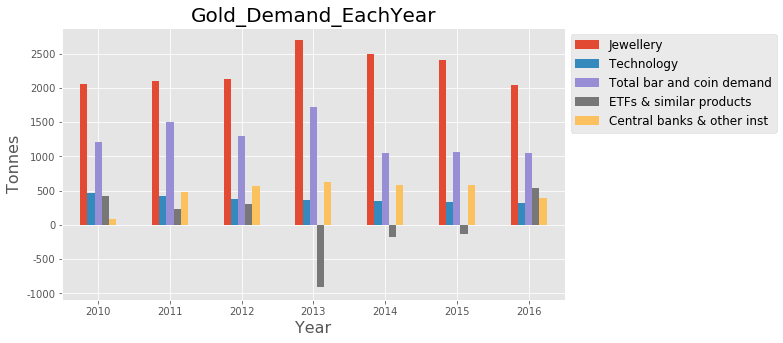

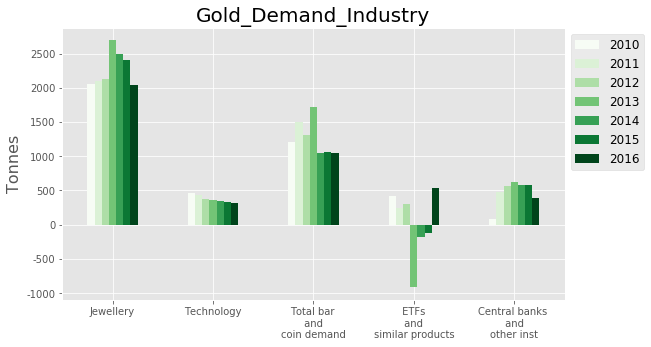

In [8]:
plt.rcdefaults()  ##reset plt.rcParams
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['axes.labelsize'] = 16  
plt.rcParams['axes.titlesize'] = 20    
plt.rcParams['legend.fontsize'] = 12  
plt.rcParams['savefig.bbox'] = 'tight'

gd.plot(kind='bar')
plt.title('Gold_Demand_EachYear') ; plt.ylabel('Tonnes') ; plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('img/gold_demand for eachyear.png')

gd_t.plot(kind='bar', colormap='Greens').set_xticklabels(xlabel, rotation=0)
plt.title('Gold_Demand_Industry') ; plt.ylabel('Tonnes')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
#plt.savefig('img/gold_demand for eachindustry.png')

## Gold Demand for each year

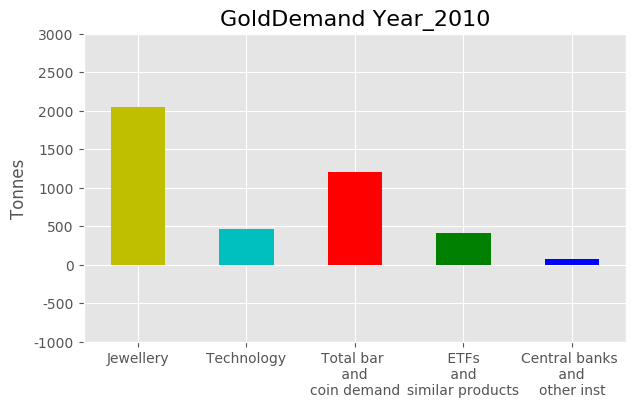

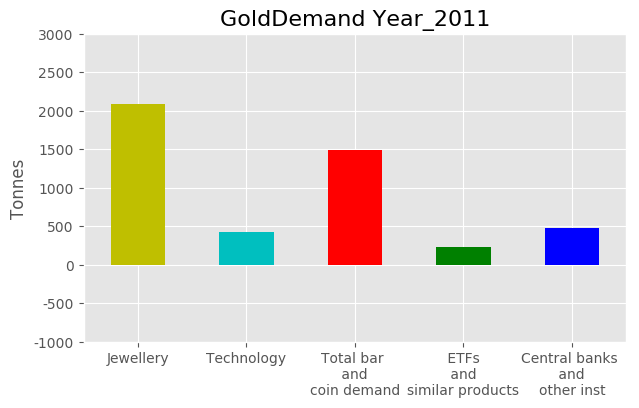

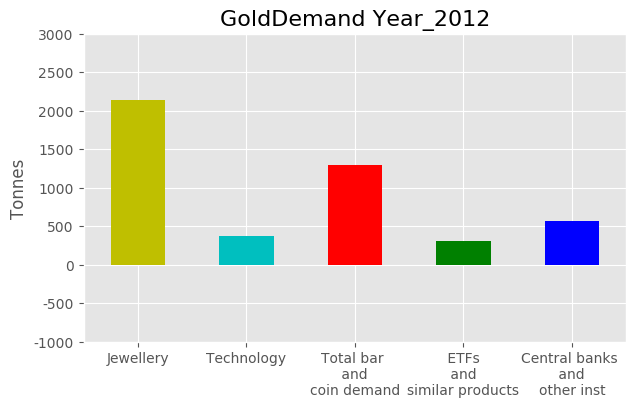

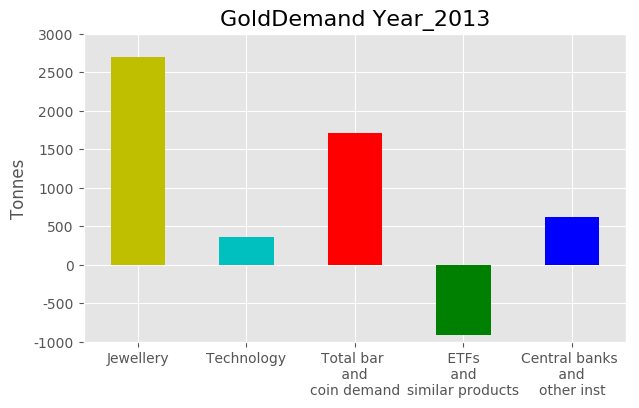

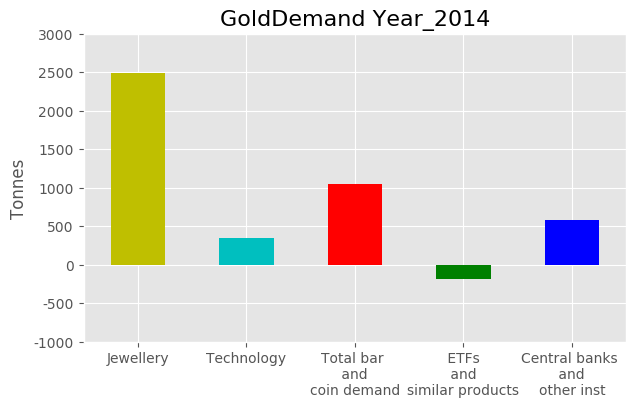

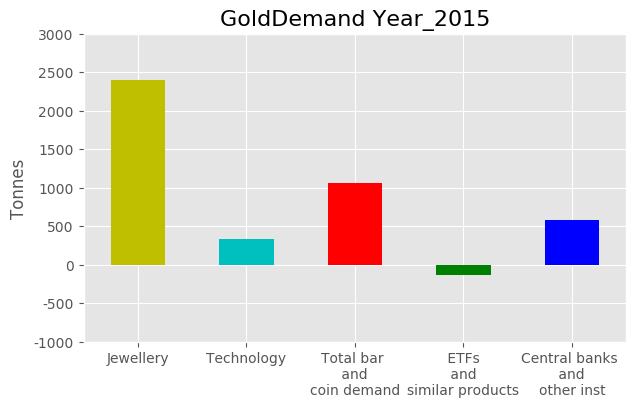

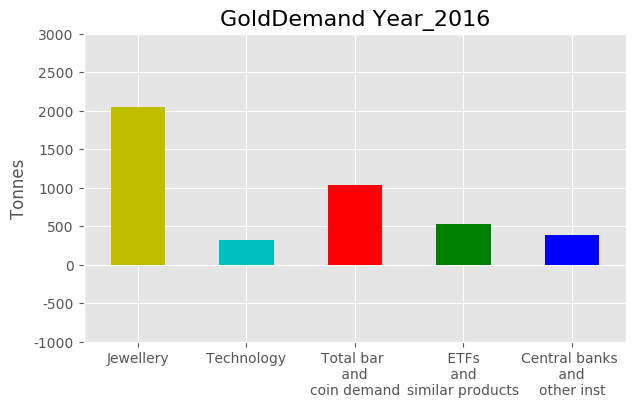

In [9]:
plt.rcdefaults()  
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 16    
#plt.rcParams['savefig.transparent'] = True 
plt.rcParams['savefig.bbox'] = 'tight' 

colors = 'ycrgb'
i=0
for num in range(len(gd_t.columns)):
    gd_t[gd_t.columns[i:i+1]].plot(kind='bar', legend=False, color = colors).set_xticklabels(xlabel, rotation=0)
    plt.title('%s%s' %('GoldDemand Year_', gd_t.columns[i])) ; plt.ylabel('Tonnes')
    plt.ylim(-1000, 3000)
    #plt.savefig('%s%s%s' %('img/GoldDemand Year_', gd_t.columns[i], '.png'))
    i += 1

## Gold Demand by Industry

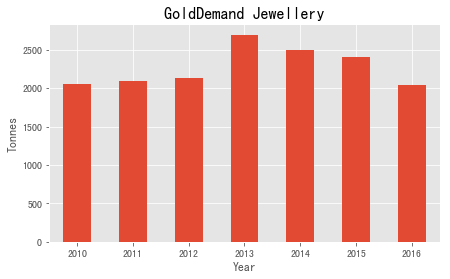

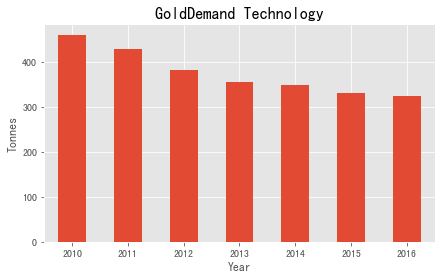

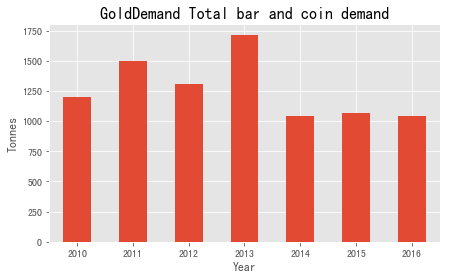

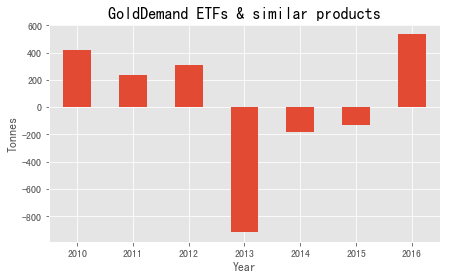

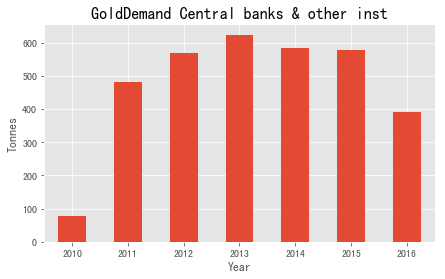

In [10]:
plt.rcdefaults() 
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['axes.labelsize'] = 12  
plt.rcParams['axes.titlesize'] = 16   
#plt.rcParams['savefig.transparent'] = True  
plt.rcParams['savefig.bbox'] = 'tight' 

colors = 'ycrgb'
i=0
for num in range(len(gd.columns)):
    gd[gd.columns[i:i+1]].plot(kind='bar', legend=False)
    plt.title('%s%s' %('GoldDemand ', gd.columns[i])) ; plt.ylabel('Tonnes') ; plt.xlabel('Year')
    #plt.ylim(-1000, 3000)
    plt.xticks(rotation=0)
    #plt.savefig('%s%s' %('img/GoldDemand ', gd.columns[i], '.png'))
    i += 1

# Gold ETF holding

In [11]:
ge = pd.read_csv('Gold_ETF.csv')
ge = ge.rename(columns={'ETF holding(Tonnes)':'ETF holding'}) 
ge['ETF holding'].astype('float') 
ge  = ge.set_index(ge['Year'])  
del ge['Year'] 
ge.tail(3)

,ETF holding,Gold Price
Year,,
2015,1618.59,1160.06
2016,2163.51,1250.80
2017,2345.22,1254.10


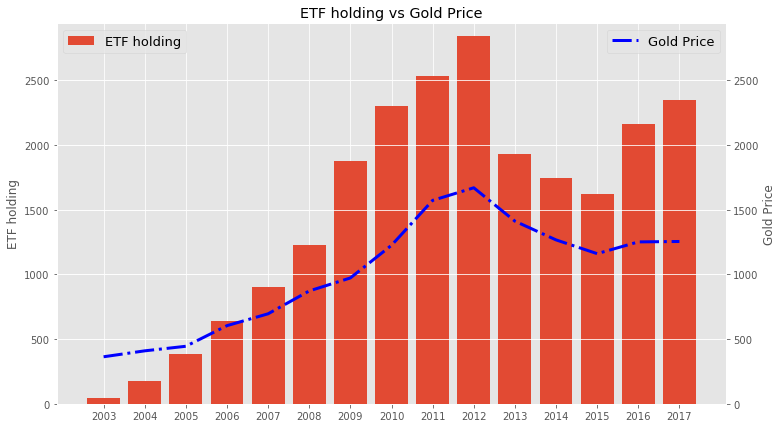

In [12]:
plt.rcdefaults()  
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,7)

fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.bar(ge.index, ge['ETF holding'], label='ETF holding')
ax2.plot(ge.index, ge['Gold Price'], color='blue', label='Gold Price', linestyle='-.', linewidth=3)
ax.set_xticks(ge.index)
ax.legend(loc='upper left', fontsize=13); ax.set_ylabel('ETF holding'); ax.set_ylim(0, ge['ETF holding'].max()+100)
ax2.legend(loc='upper right', fontsize=13); ax2.set_ylabel('Gold Price'); ax2.set_ylim(0, ge['ETF holding'].max()+100)
plt.title('ETF holding vs Gold Price')

#plt.savefig('img/ETF holding vs Gold price.png')